In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import rcParams as rc

In [2]:
rc['figure.figsize']=(5,4)
rc['font.size']=12
rc['axes.labelsize']=14
rc['lines.linewidth']=2
rc['text.usetex']=False
rc['savefig.bbox']='tight'
rc['mathtext.fontset']='dejavuserif'
rc['legend.fontsize']=14
# print(rc.keys())

In [83]:
C=100
h=3.5
A=50
P=25
Wo=-0.7
Wp=1
Wn=-1.4
lo=20
l=60

en=-90#eo+0.7
eo=en+15
ep=en+20#eo+2

k=4*np.pi**2*C/h**2
p=4*np.pi**2*P/h**2

wo=Wo*h/l
wp=Wp*h/l
wn=Wn*h/l

mu_o=-eo/l
mu_n=-en/l
mu_p=-ep/l

sig=np.linspace(-0.3,0.3,200)


In [21]:
def g(f):
    return f - np.sqrt(f/A)

def Fs(s,f):
    return 0.5*k*s**2 - g(f)

def Fpl(s):
    return 0.5*p*s**2

def sig_spl(f):
    return np.array([np.sqrt(2*p*g(f)/(1-p/k))/k,np.sqrt(2*p*g(f)/(1-p/k))/p])

def Fcoex_spl(s,f):
    return -g(f)/(1-p/k)+np.sqrt(2*p*g(f)/(1-p/k))*abs(s)

def Fo(s,f):
    return 0.5*k*(s-wo)**2 - mu_o - g(f)*lo/l

def Fn(s):
    return 0.5*k*(s-wn)**2 - mu_n

def Fp(s,f):
    return 0.5*k*(s-wp)**2 - mu_p - g(f)*lo/l


def sig_nuc_sc(f,w,x,mu):
    de=g(f)-mu-g(f)*x
    return np.array([w+de/(k*w), de/(k*w)])


def Fcoex_nuc_sc(s,f,w,x,mu):
    de=g(f)-mu-g(f)*x
    return de*s/w - de**2/(2*k*w**2) - g(f)

def Torq_isc(f,w,x,mu):
    gam=g(f)-mu-g(f)*x
    return (h/(2*np.pi))*gam/w

def sig_ij(f,w,x,mu):
    wi,wj=w
    xi,xj=x
    mi,mj=mu
    dij=(mi-mj+g(f)*(xi-xj))/(wi-wj)
    return np.array([wi-dij/k, wj-dij/k])

def Fij(s,f,w,x,mu):
    wi,wj=w
    xi,xj=x
    mi,mj=mu
    dij=(mi-mj+g(f)*(xi-xj))/(wi-wj)
    return -dij*(s-wi)-mi-g(f)*xi-0.5*dij**2/k

def Torq_ij(f,w,x,mu):
    wi,wj=w
    xi,xj=x
    mi,mj=mu
    dij=(mi-mj+g(f)*(xi-xj))/(wi-wj)
    return -(h/(2*np.pi))*dij

def sig_ipl(f,wi,xi,mi):
    alp=1-p/k
    gam=mi+g(f)*xi
    val=np.sqrt(wi**2+2*alp*gam/p)
    return np.array([wi+(1-alp)*val,wi+val])/alp
                    # wi/alp+(1/alp)*np.sqrt(wi**2+2*alp*gam/p)])

def Fipl(s,f,wi,xi,mi):
    alp=1-p/k
    gam=mi+g(f)*xi
    val=np.sqrt(wi**2+2*alp*gam/p)
    return -0.5*p*(wi+val)**2/alp**2 + p*(wi+val)*s/alp
    (1+np.sqrt(1+2*alp*gam/(p*wi**2)))**2 +p*wi*(1+np.sqrt(1+2*alp*gam/(p*wi**2)))*s/alp


[-0.12033066 -0.07949732]
no -6.940943521141659
op 4.730446662727687
np 1.326291192432461


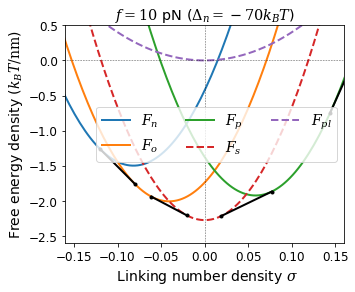

In [84]:
fz=0.25*10

plt.plot(sig, Fn(sig),label='$F_n$')
plt.plot(sig, Fo(sig,fz),label='$F_o$')
plt.plot(sig, Fp(sig,fz),label='$F_p$')


print(sig_ij(fz,(wn,wo),(0,lo/l),(mu_n,mu_o)))


plt.plot(sig_ij(fz,(wn,wo),(0,lo/l),(mu_n,mu_o)),Fij(sig_ij(fz,(wn,wo),(0,lo/l),(mu_n,mu_o)), fz,(wn,wo),(0,lo/l),(mu_n,mu_o)),'k.-')
print('no',Torq_ij(fz,(wn,wo),(0,lo/l),(mu_n,mu_o)))
print('op',Torq_ij(fz,(wo,wp),(lo/l,0),(mu_o,mu_p)))
print('np',Torq_ij(fz,(wn,wp),(0,0),(mu_n,mu_p)))

# plt.plot(sig_ij(fz,(wo,wp),(lo/l,lo/l),(mu_o,mu_p)),Fij(sig_ij(fz,(wo,wp),(lo/l,lo/l),(mu_o,mu_p)), fz,(wo,wp),(lo/l,lo/l),(mu_o,mu_p)),'k.-')
# plt.plot(sig_ij(fz,(wn,wp),(0,lo/l),(mu_n,mu_p)),Fij(sig_ij(fz,(wn,wp),(0,lo/l),(mu_n,mu_p)), fz,(wn,wp),(0,lo/l),(mu_n,mu_p)),'k.-')


plt.plot(sig,Fs(sig,fz),'--',label='$F_s$')
plt.plot(sig,Fpl(sig),'--',label='$F_{pl}$')

# plt.plot(sig_nuc_sc(fz,wn,0,mu_n),Fcoex_nuc_sc(sig_nuc_sc(fz,wn,0,mu_n),fz,wn,0,mu_n),'k.-')
plt.plot(sig_nuc_sc(fz,wo,lo/l,mu_o),Fcoex_nuc_sc(sig_nuc_sc(fz,wo,lo/l,mu_o),fz,wo,lo/l,mu_o),'k.-')
plt.plot(sig_nuc_sc(fz,wp,lo/l,mu_p),Fcoex_nuc_sc(sig_nuc_sc(fz,wp,lo/l,mu_p),fz,wp,lo/l,mu_p),'k.-')

# plt.plot(sig_spl(fz),Fcoex_spl(sig_spl(fz),fz),'k.-',)
# plt.plot(-sig_spl(fz),Fcoex_spl(-sig_spl(fz),fz),'k.-',)

snp=sig_ipl(fz,wp,lo/l,mu_p)
# plt.plot(snp,[Fp(snp[0]),Fpl(snp[1])],'k.-')
plt.plot(snp, Fipl(snp,fz,wp,lo/l,mu_p),'k.-')
# plt.plot(sig_ipl(fz,wn,0,mu_n))
plt.title('$f=10$ pN ($\\Delta_n=-70 k_BT$)')
plt.ylim(-2.6,0.5)
plt.xlim(-0.16,0.16)
plt.xlabel(' Linking number density $\\sigma$')
plt.ylabel('Free energy density ($k_BT/\\rm nm$)')
plt.axhline(0,c='k',ls=':',lw=0.6)
plt.axvline(0,c='k',ls=':',lw=0.6)
plt.legend(ncol=3)
# plt.legend(loc='lower right',bbox_to_anchor=(1.3,0.3))
# plt.savefig('../plots/FE_nuc_chiral_states_scDNA_10pN_higherD.png',dpi=300)

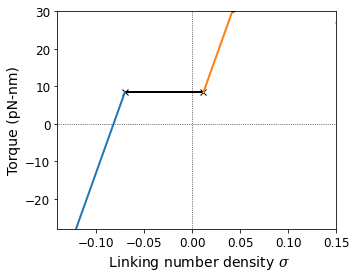

In [76]:
ns=sig_nuc_sc(fz,wn,0,mu_n)
sp=sig_spl(fz)
plt.plot(ns,4*Torq_isc(fz,wn,0,mu_n)*np.ones(2),'kx-')
# plt.axhline((g(fz)-mu_n)/wn)
plt.plot([ns[0],-0.15],4*(np.array([ns[0],-0.15])-wn)*k*h/(2*np.pi),'C0')
plt.plot([ns[1],sp[0]],4*(np.array([ns[1],sp[0]]))*k*h/(2*np.pi),'C1')
plt.plot(sp,4*(np.sqrt(2*p*g(fz)/(1-p/k))*h/(2*np.pi))*np.ones(2),'k.-')
plt.plot([sp[1],0.15],4*(p*h/(2*np.pi))*np.array([sp[1],0.15]),'C2')



plt.xlim(-0.14,0.15)
plt.ylim(-28,30)
plt.axhline(0,c='k',ls=':',lw=0.7)
plt.axvline(0,c='k',ls=':',lw=0.7)

plt.xlabel(' Linking number density $\\sigma$')
plt.ylabel('Torque (pN-nm)')
plt.savefig('../plots/Torq_nuc_stretch_plect.png',dpi=300, bbox_inches='tight')

In [227]:
print(l*(Fn(0)-Fo(0,0.35)))

0.6583499336648091
